In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import time

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

C:\Users\pedro\Miniconda3\envs\specialTopics\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\pedro\Miniconda3\envs\specialTopics\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\pedro\Miniconda3\envs\specialTopics\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\pedro\Miniconda3\envs\specialTopics\l

1.13.1


In [3]:
# dataset
dataset_path = "orbitKepl.dat"
nPast = 10
columns = np.append(np.arange(-nPast,0),['y','e','flag'])

raw_dataset = pd.read_csv(dataset_path, names=columns, comment='\t', sep="\t")
dataset = raw_dataset.copy()
flag = dataset.pop('flag')

# excluded
excluded_path = "orbitKeplOvelha.dat"
columns = np.append(np.arange(-nPast,0),['y','e','flag'])
raw_excluded = pd.read_csv(excluded_path, names=columns, comment='\t', sep="\t")
excluded = raw_excluded.copy()
excluded.pop('flag')
excluded.iloc[-1]
flag

0      5
1      0
2      0
3      0
4      0
      ..
230    0
231    0
232    0
233    0
234    0
Name: flag, Length: 235, dtype: int64

-10    0.555680
-9     0.557119
-8     0.558552
-7     0.559979
-6     0.561401
-5     0.562818
-4     0.564230
-3     0.565636
-2     0.567037
-1     0.568433
y      0.569824
e      0.395000
Name: 234, dtype: float64

0          1
1          0
2          0
3          0
4          0
          ..
1195931    0
1195932    0
1195933    0
1195934    0
1195935    0
Name: flag, Length: 1195936, dtype: int64

In [4]:
train_dataset = dataset.sample(frac=0.8,random_state=1)
test_dataset = dataset.drop(train_dataset.index)
validation_dataset = train_dataset.sample(frac=0.2,random_state=1)
train_dataset = train_dataset.drop(validation_dataset.index)

# test_dataset.tail()

In [5]:
train_labels = train_dataset.pop('y')
test_labels = test_dataset.pop('y')
validation_labels = validation_dataset.pop('y')

train_dataset
train_labels
validation_dataset
validation_labels

,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,e
361745,0.081957,0.085061,0.088161,0.091256,0.094348,0.097435,0.100518,0.103596,0.106669,0.109738,0.330
1067485,0.107155,0.110633,0.114099,0.117554,0.120996,0.124425,0.127842,0.131245,0.134636,0.138012,0.790
163904,0.592241,0.593944,0.595641,0.597334,0.599023,0.600707,0.602387,0.604062,0.605732,0.607399,0.245
201862,0.491372,0.493332,0.495286,0.497234,0.499175,0.501110,0.503040,0.504963,0.506880,0.508791,0.260
298540,0.340870,0.343282,0.345686,0.348081,0.350468,0.352847,0.355217,0.357579,0.359933,0.362278,0.300
...,...,...,...,...,...,...,...,...,...,...,...
867991,0.075157,0.078580,0.081995,0.085403,0.088803,0.092195,0.095580,0.098956,0.102323,0.105681,0.635
36088,0.850062,0.851444,0.852825,0.854204,0.855582,0.856959,0.858334,0.859708,0.861081,0.862452,0.205
347298,0.553728,0.555342,0.556950,0.558553,0.560150,0.561742,0.563329,0.564911,0.566487,0.568058,0.320
266914,0.245676,0.248398,0.251112,0.253818,0.256517,0.259207,0.261890,0.264565,0.267232,0.269891,0.285


361745     0.112801
1067485    0.141375
163904     0.609061
201862     0.510696
298540     0.364615
             ...   
867991     0.109030
36088      0.863823
347298     0.569624
266914     0.272542
1163884    0.237230
Name: y, Length: 765399, dtype: float64

,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,e
228386,0.506165,0.508055,0.509939,0.511816,0.513688,0.515554,0.517414,0.519268,0.521116,0.522958,0.270
110443,0.764013,0.765396,0.766777,0.768155,0.769531,0.770905,0.772276,0.773646,0.775013,0.776379,0.230
995215,0.025221,0.028816,0.032408,0.035997,0.039582,0.043162,0.046738,0.050309,0.053874,0.057434,0.735
963606,0.142786,0.146072,0.149345,0.152604,0.155850,0.159083,0.162302,0.165507,0.168698,0.171875,0.710
1157419,0.370190,0.372120,0.374036,0.375938,0.377827,0.379702,0.381563,0.383412,0.385247,0.387069,0.870
...,...,...,...,...,...,...,...,...,...,...,...
918658,0.348661,0.350818,0.352962,0.355093,0.357210,0.359314,0.361405,0.363483,0.365548,0.367600,0.675
819428,0.002338,0.005800,0.009263,0.012724,0.016185,0.019644,0.023101,0.026556,0.030009,0.033459,0.600
731562,0.234592,0.237393,0.240181,0.242956,0.245719,0.248468,0.251204,0.253927,0.256638,0.259335,0.540
844011,0.307702,0.310122,0.312529,0.314922,0.317301,0.319667,0.322018,0.324356,0.326681,0.328991,0.620


228386     0.524794
110443     0.777742
995215     0.060988
963606     0.175037
1157419    0.388878
             ...   
918658     0.369639
819428     0.036906
731562     0.262019
844011     0.331289
737054     0.258841
Name: y, Length: 191350, dtype: float64

In [6]:
def build_model():
  model = keras.Sequential([
    layers.Dense(25, activation='relu', input_shape=[len(train_dataset.keys())], use_bias=True),
    layers.Dense(25, activation='relu', use_bias=True),
    layers.Dense(1, use_bias=True)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.0001)

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])
  return model

In [7]:
model = build_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                300       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 976
Trainable params: 976
Non-trainable params: 0
_________________________________________________________________


In [8]:
EPOCHS = 20

#early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

history = model.fit(
    train_dataset, train_labels,
    epochs=EPOCHS, validation_data = (validation_dataset,validation_labels), verbose=1, use_multiprocessing = True)



Train on 765399 samples, validate on 191350 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
765399/765399 [==============================] - 21s 27us/sample - loss: 3.9886e-06 - mean_absolute_error: 5.7252e-04 - mean_squared_error: 3.9886e-06 - val_loss: 2.8921e-06 - val_mean_absolute_error: 0.0014 - val_mean_squared_error: 2.8921e-06
Epoch 2/20
765399/765399 [==============================] - 20s 27us/sample - loss: 3.6639e-07 - mean_absolute_error: 3.9815e-04 - mean_squared_error: 3.6639e-07 - val_loss: 5.4508e-08 - val_mean_absolute_error: 1.7827e-04 - val_mean_squared_error: 5.4508e-08
Epoch 3/20
765399/765399 [==============================] - 20s 26us/sample - loss: 2.9828e-07 - mean_absolute_error: 3.7551e-04 - mean_squared_error: 2.9828e-07 - val_loss: 5.2878e-07 - val_mean_absolute_error: 6.2918e-04 - val_mean_squared_error: 5.2878e-07
Epoch 4/20
765399/765399 [==============================] - 20s 27us/sample - loss: 2.7339e-07 - mean_absolute_error: 3.3082

In [51]:
%matplotlib qt
_=plt.plot(history.history['loss'])
_=plt.plot(history.history['val_loss'])
_=plt.yscale('log')
_=plt.title('model loss')
_=plt.ylabel('loss')
_=plt.xlabel('epoch')
_=plt.legend(['loss','val_loss'],loc='upper right')


In [52]:
test_predictions = model.predict(test_dataset).flatten()
%matplotlib qt
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [norm deg]')
plt.ylabel('Predictions [norm deg]')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


Text(0.5, 0, 'True Values [norm deg]')

Text(0, 0.5, 'Predictions [norm deg]')

(0.0, 1.0)

(0.0, 1.0)

0.021470965058721644

0.013117670148272344

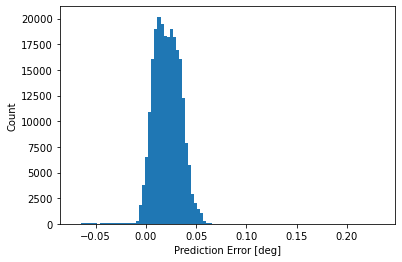

In [84]:
error = (test_predictions - test_labels)*180
%matplotlib qt
_ = plt.hist(error, bins = 100)
_ = plt.xlabel("Prediction Error [deg]")
_ = plt.ylabel("Count")
mean = np.mean(error)
mean
np.std(error)

In [81]:
ixL = 0
excluded
excluded.index[-1]

excluded.index[-1]+1
nMax = excluded.index[-1]+1
test1 = excluded.iloc[ixL:ixL+1,:].copy()
for i in np.arange(ixL,int(nMax)):
    test1.loc[i,'y'] = model.predict(test1.loc[i:i+1,:].drop('y',axis=1))-mean/180
    if i != int(nMax-1):
        test1.loc[i+1,0:nPast] = test1.loc[i,:].shift(-1)
        test1.loc[i+1,'e'] = test1.loc[i,'e']
test1

,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,y,e
0,0.000323,0.003557,0.006790,0.010023,0.013256,0.016487,0.019718,0.022947,0.026176,0.029402,0.032627,0.395
1,0.003557,0.006790,0.010023,0.013256,0.016487,0.019718,0.022947,0.026176,0.029402,0.032627,0.035850,0.395
2,0.006790,0.010023,0.013256,0.016487,0.019718,0.022947,0.026176,0.029402,0.032627,0.035850,0.039071,0.395
3,0.010023,0.013256,0.016487,0.019718,0.022947,0.026176,0.029402,0.032627,0.035850,0.039071,0.042290,0.395
4,0.013256,0.016487,0.019718,0.022947,0.026176,0.029402,0.032627,0.035850,0.039071,0.042290,0.045506,0.395
...,...,...,...,...,...,...,...,...,...,...,...,...
230,0.549872,0.551332,0.552787,0.554236,0.555680,0.557119,0.558552,0.559979,0.561401,0.562818,0.564230,0.395
231,0.551332,0.552787,0.554236,0.555680,0.557119,0.558552,0.559979,0.561401,0.562818,0.564230,0.565636,0.395
232,0.552787,0.554236,0.555680,0.557119,0.558552,0.559979,0.561401,0.562818,0.564230,0.565636,0.567037,0.395
233,0.554236,0.555680,0.557119,0.558552,0.559979,0.561401,0.562818,0.564230,0.565636,0.567037,0.568433,0.395


234

235

,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,y,e
0,0.000323,0.003557,0.006790,0.010023,0.013256,0.016487,0.019718,0.022947,0.026176,0.029402,0.032755,0.395
1,0.003557,0.006790,0.010023,0.013256,0.016487,0.019718,0.022947,0.026176,0.029402,0.032755,0.035981,0.395
2,0.006790,0.010023,0.013256,0.016487,0.019718,0.022947,0.026176,0.029402,0.032755,0.035981,0.039214,0.395
3,0.010023,0.013256,0.016487,0.019718,0.022947,0.026176,0.029402,0.032755,0.035981,0.039214,0.042440,0.395
4,0.013256,0.016487,0.019718,0.022947,0.026176,0.029402,0.032755,0.035981,0.039214,0.042440,0.045656,0.395
...,...,...,...,...,...,...,...,...,...,...,...,...
230,0.550215,0.551674,0.553126,0.554572,0.556013,0.557447,0.558875,0.560298,0.561714,0.563125,0.564529,0.395
231,0.551674,0.553126,0.554572,0.556013,0.557447,0.558875,0.560298,0.561714,0.563125,0.564529,0.565928,0.395
232,0.553126,0.554572,0.556013,0.557447,0.558875,0.560298,0.561714,0.563125,0.564529,0.565928,0.567321,0.395
233,0.554572,0.556013,0.557447,0.558875,0.560298,0.561714,0.563125,0.564529,0.565928,0.567321,0.568709,0.395


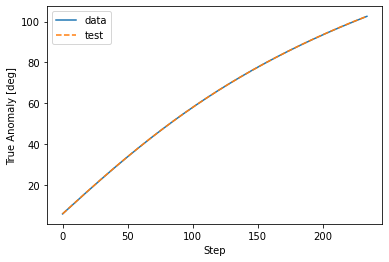

In [82]:
%matplotlib qt
plt.plot(excluded['y']*180)
plt.plot(test1['y']*180,'--')
_ = plt.ylabel("True Anomaly [deg]")
_ = plt.xlabel("Step")
plt.legend(['data','test'],loc='best')

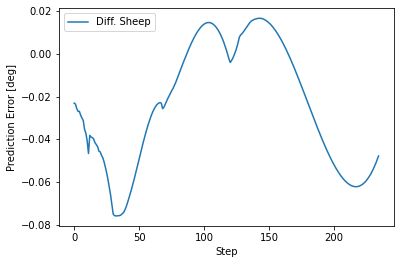

In [83]:
%matplotlib qt
plt.plot((excluded['y']-test1['y'])*180)
_ = plt.ylabel("Prediction Error [deg]")
_ = plt.xlabel("Step")
plt.legend(['Diff. Sheep'],loc='upper left')

In [65]:
ix_s =  flag.index[flag.iloc[:]==3].to_numpy()
ix_f = (flag.index[flag.iloc[:]==4]-1).to_numpy()
ix_s
ix_f

eps = []
eps_max = []

for j in np.arange(0,len(ix_s)):
    t = time.time()
    j
    
    ixL = ix_s[j]
    nMax = ix_f[j]
    test2 = dataset.iloc[ixL:ixL+1,:].copy()
    for i in np.arange(ixL,int(nMax)):
        test2.loc[i,'y'] = model.predict(test2.loc[i:i+1,:].drop('y',axis=1))-mean/180
        if i != int(nMax-1):
            test2.loc[i+1,0:nPast] = test2.loc[i,:].shift(-1)
            test2.loc[i+1,'e'] = test2.loc[i,'e']
    eps.append(test2.iloc[-1,-2])
    eps_max.append((test2.loc[:,'y']-dataset.loc[ixL:nMax,'y']).max())
    
    print('Elapsed time ', (time.time()-t))

array([   1002,   21031,   41157,   59581,   76775,   93169,  108945,
        124203,  139021,  153446,  167520,  181274,  194739,  207932,
        220876,  233586,  246077,  258360,  270448,  282352,  294080,
        305640,  317041,  328289,  339393,  350354,  361183,  371882,
        382456,  392910,  403248,  413476,  423594,  433607,  443521,
        453336,  463054,  472682,  482220,  491666,  500949,  510151,
        519275,  528322,  537295,  546195,  555026,  563786,  572478,
        581106,  589667,  598165,  606603,  614980,  623298,  631559,
        639761,  647909,  656002,  664040,  672027,  679963,  687847,
        695683,  703470,  711209,  718902,  726548,  734147,  741704,
        749217,  756687,  764114,  771500,  778845,  786150,  793415,
        800641,  807828,  814978,  822090,  829167,  836207,  843211,
        850180,  857114,  864014,  870880,  877715,  884515,  891283,
        898019,  904724,  911400,  918043,  924656,  931239,  937795,
        944320,  950

array([   1502,   21536,   41619,   60011,   77185,   93563,  109326,
        124573,  139382,  153798,  167864,  181610,  195069,  208255,
        221193,  233898,  246384,  258662,  270745,  282645,  294369,
        305925,  317322,  328566,  339667,  350624,  361450,  372146,
        382717,  393168,  403503,  413729,  423844,  433854,  443766,
        453579,  463294,  472920,  482456,  491898,  501179,  510379,
        519501,  528546,  537517,  546415,  555245,  564003,  572693,
        581320,  589879,  598375,  606812,  615187,  623504,  631764,
        639964,  648111,  656202,  664239,  672225,  680160,  688042,
        695877,  703663,  711401,  719093,  726738,  734335,  741891,
        749403,  756872,  764298,  771683,  779027,  786331,  793595,
        800820,  808006,  815155,  822266,  829342,  836382,  843385,
        850353,  857286,  864185,  871050,  877884,  884684,  891451,
        898186,  904890,  911566,  918208,  924820,  931402,  937958,
        944482,  950

0

Elapsed time  1.96158766746521


1

Elapsed time  1.923311471939087


2

Elapsed time  1.7834017276763916


3

Elapsed time  1.6593732833862305


4

Elapsed time  1.580596923828125


5

Elapsed time  1.563352108001709


6

Elapsed time  1.5358517169952393


7

Elapsed time  1.448157787322998


8

Elapsed time  1.4107069969177246


9

Elapsed time  1.3543212413787842


10

Elapsed time  1.3202974796295166


11

Elapsed time  1.2852892875671387


12

Elapsed time  1.256291389465332


13

Elapsed time  1.2322771549224854


14

Elapsed time  1.2152647972106934


15

Elapsed time  1.1922683715820312


16

Elapsed time  1.1882679462432861


17

Elapsed time  1.1562604904174805


18

Elapsed time  1.1412651538848877


19

Elapsed time  1.1291303634643555


20

Elapsed time  1.1136162281036377


21

Elapsed time  1.0946683883666992


22

Elapsed time  1.0852437019348145


23

Elapsed time  1.0692410469055176


24

Elapsed time  1.0632479190826416


25

Elapsed time  1.0372250080108643


26

Elapsed time  1.0202381610870361


27

Elapsed time  1.0102195739746094


28

Elapsed time  1.0002250671386719


29

Elapsed time  0.9852221012115479


30

Elapsed time  0.9752194881439209


31

Elapsed time  0.9652173519134521


32

Elapsed time  0.9502136707305908


33

Elapsed time  0.9402122497558594


34

Elapsed time  0.9332013130187988


35

Elapsed time  0.9232075214385986


36

Elapsed time  0.91721510887146


37

Elapsed time  0.9031953811645508


38

Elapsed time  0.903212308883667


39

Elapsed time  0.8851995468139648


40

Elapsed time  0.876197338104248


41

Elapsed time  0.8721961975097656


42

Elapsed time  0.8631863594055176


43

Elapsed time  0.8611938953399658


44

Elapsed time  0.8541920185089111


45

Elapsed time  0.8461990356445312


46

Elapsed time  0.8381803035736084


47

Elapsed time  0.8321871757507324


48

Elapsed time  0.8211932182312012


49

Elapsed time  0.8181841373443604


50

Elapsed time  0.8081822395324707


51

Elapsed time  0.8021805286407471


52

Elapsed time  0.7971792221069336


53

Elapsed time  0.7931787967681885


54

Elapsed time  0.7861771583557129


55

Elapsed time  0.7791671752929688


56

Elapsed time  0.7731823921203613


57

Elapsed time  0.7771663665771484


58

Elapsed time  0.7621798515319824


59

Elapsed time  0.7611629962921143


60

Elapsed time  0.7531700134277344


61

Elapsed time  0.7521696090698242


62

Elapsed time  0.7411665916442871


63

Elapsed time  0.7401580810546875


64

Elapsed time  0.7381749153137207


65

Elapsed time  0.734156608581543


66

Elapsed time  0.7301731109619141


67

Elapsed time  0.7241885662078857


68

Elapsed time  0.7251629829406738


69

Elapsed time  0.7101600170135498


70

Elapsed time  0.7121610641479492


71

Elapsed time  0.7001593112945557


72

Elapsed time  0.7014462947845459


73

Elapsed time  0.7011570930480957


74

Elapsed time  0.6981570720672607


75

Elapsed time  0.6931543350219727


76

Elapsed time  0.6961567401885986


77

Elapsed time  0.6801536083221436


78

Elapsed time  0.6827518939971924


79

Elapsed time  0.6761519908905029


80

Elapsed time  0.6701509952545166


81

Elapsed time  0.6718363761901855


82

Elapsed time  0.6861460208892822


83

Elapsed time  0.6971676349639893


84

Elapsed time  0.6701512336730957


85

Elapsed time  0.6711509227752686


86

Elapsed time  0.6651501655578613


87

Elapsed time  0.6641497611999512


88

Elapsed time  0.6471457481384277


89

Elapsed time  0.6941559314727783


90

Elapsed time  0.6421456336975098


91

Elapsed time  0.6431441307067871


92

Elapsed time  0.636143684387207


93

Elapsed time  0.6326870918273926


94

Elapsed time  0.632134199142456


95

Elapsed time  0.619147777557373


96

Elapsed time  0.6181306838989258


97

Elapsed time  0.6251406669616699


98

Elapsed time  0.6133978366851807


99

Elapsed time  0.6205461025238037


100

Elapsed time  0.6071279048919678


101

Elapsed time  0.6091375350952148


102

Elapsed time  0.6071362495422363


103

Elapsed time  0.6022090911865234


104

Elapsed time  0.6111371517181396


105

Elapsed time  0.5951888561248779


106

Elapsed time  0.5981347560882568


107

Elapsed time  0.5921332836151123


108

Elapsed time  0.5862851142883301


109

Elapsed time  0.5921339988708496


110

Elapsed time  0.5841314792633057


111

Elapsed time  0.5851316452026367


112

Elapsed time  0.5841314792633057


113

Elapsed time  0.582129716873169


114

Elapsed time  0.5811309814453125


115

Elapsed time  0.5771303176879883


116

Elapsed time  0.5753612518310547


117

Elapsed time  0.5691359043121338


118

Elapsed time  0.5661189556121826


119

Elapsed time  0.5701284408569336


120

Elapsed time  0.5587368011474609


121

Elapsed time  0.5661275386810303


122

Elapsed time  0.5591254234313965


123

Elapsed time  0.5531246662139893


124

Elapsed time  0.5561254024505615


125

Elapsed time  0.556124210357666


126

Elapsed time  0.5510303974151611


127

Elapsed time  0.5471229553222656


128

Elapsed time  0.5441229343414307


129

Elapsed time  0.5451302528381348


130

Elapsed time  0.5421140193939209


131

Elapsed time  0.5378963947296143


132

Elapsed time  0.544114351272583


133

Elapsed time  0.5375156402587891


134

Elapsed time  0.5341119766235352


135

Elapsed time  0.5311193466186523


136

Elapsed time  0.5311195850372314


137

Elapsed time  0.5301191806793213


138

Elapsed time  0.5251185894012451


139

Elapsed time  0.5281188488006592


In [110]:
#dataset.iloc[ix_s,-1]
#np.multiply(eps_max,180)
%matplotlib 
plt.plot(dataset.iloc[ix_s,-1], np.multiply(eps-dataset.iloc[ix_f,-2],180)) #dataset.iloc[ix_s,-1] #ix_f-ix_s #eps-dataset.iloc[ix_f,-2] #np.multiply(eps-dataset.iloc[ix_f,-2],1)
_ = plt.ylabel("Prediction Error at End [deg]")
_ = plt.xlabel("Eccentricity")
#eps-dataset.iloc[ix_f,-2]
#ix_f-ix_s

Using matplotlib backend: Qt5Agg


In [98]:
ixL = 20019
nMax = 20524-ixL
test2 = dataset.iloc[ixL:ixL+1,:].copy()

t = time.time()

for i in np.arange(ixL,int(nMax)):
    test2.loc[i,'y'] = model.predict(test2.loc[i:i+1,:].drop('y',axis=1))-mean/180
    if i != int(nMax-1):
        test2.loc[i+1,0:nPast] = test2.loc[i,:].shift(-1)
        test2.loc[i+1,'e'] = test2.loc[i,'e']
# test2
print('Elapsed time ', (time.time()-t))

Elapsed time  0.0


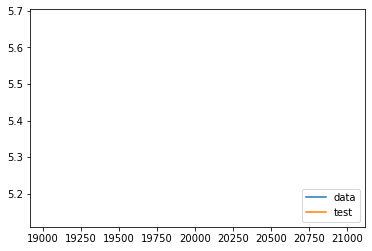

In [99]:
%matplotlib inline
plt.plot(dataset.loc[ixL:nMax,'y']*180)
plt.plot(test2['y']*180)
plt.legend(['data','test'],loc='lower right')

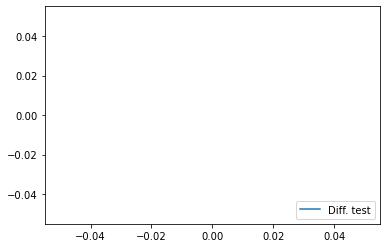

In [100]:
%matplotlib inline
plt.plot((dataset.loc[ixL:nMax,'y']-test2['y'])*180)
plt.legend(['Diff. test'],loc='lower right')
